This notebook uses the LineDetection class to retrieve the coordinates of streaks in images. The purpose of this notebook is to provide an experimentation space to use that class structure and apply it on various images. 

You must have the line_detection.py file in the same folder as this notebook. Additionally, you should have a "Data" folder containing the images that you want to analyze. So far, this code has been tested on 8 images obtained from the following source:

https://epyc.astro.washington.edu/~dinob/dssg/



In [2]:
#Import the module and other libraries
import line_detection_updated as ls
import image_rotation
import pixelplot
from astropy.io import fits
import astropy.visualization as aviz
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim
import gaussian
%matplotlib inline


In [3]:
#Import your data
'''
I am pasting 8 images that I worked with to write this code. 
But you can use this format to import any image you want
'''

#img1 = fits.open('/home/localdir/satmetrics/Data/calexp-0941420_07.fits', cache = True)
#img2 = fits.open('/home/localdir/satmetrics/Data/calexp-0941422_33.fits', cache = True)
#img3 = fits.open('/home/localdir/satmetrics/Data/calexp-0941424_34.fits', cache = True)
#img4 = fits.open('/home/localdir/satmetrics/Data/calexp-0941426_16.fits', cache = True)
#img5 = fits.open('/home/localdir/satmetrics/Data/calexp-0941424_37.fits', cache = True)
# img6 = fits.open('Data/STARLINK-1892-20220305200929.fits',cache = True)
# img7 = fits.open('Data/STARLINK-1892-N-20220305200959.fits',cache = True)
# img8 = fits.open('Data/STARLINK-1905-20220305191929.fits',cache = True)
img9 = fits.open('Data/bi327715.fits',cache = True)



In [4]:
#Importing the class
detector = ls.LineDetection()
detector.image = img9[0].data

results_hough_transform = detector.hough_transformation()
clustered_lines = ls.cluster(results_hough_transform["Cartesian Coordinates"], results_hough_transform["Lines"])

#Rotating the image for analysis
rotated_images = image_rotation.rotate_img_clustered(clustered_lines = clustered_lines,
                        angles = results_hough_transform["Angles"], 
                        image = img9[0].data, cart_coord = results_hough_transform["Cartesian Coordinates"])

Found 12 lines.
21
21
21
21


: 

: 

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>, <Axes:>)

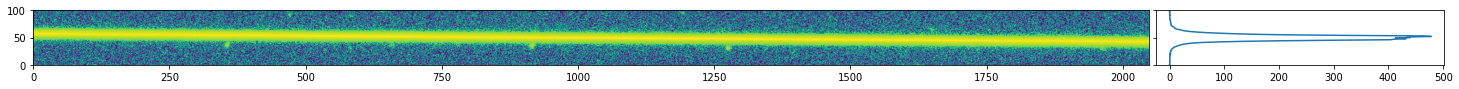

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
pixelplot.pixelplot(rotated_images[0][5], fig = fig, ax = ax)

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>, <Axes:>)

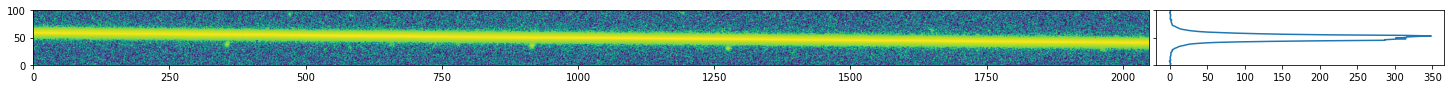

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
pixelplot.pixelplot(rotated_images[0][4], fig = fig, ax = ax)

/home/localdir/satmetrics/gaussian.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


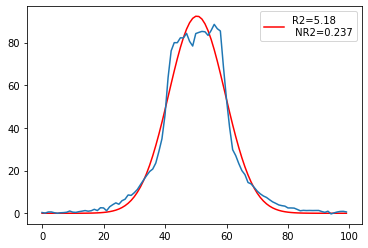

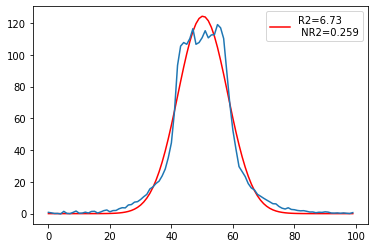

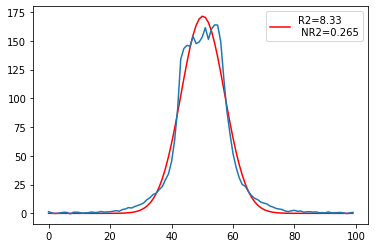

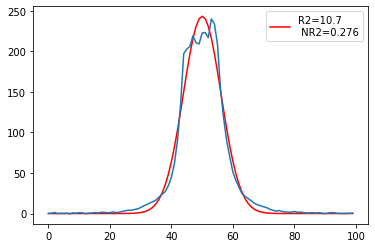

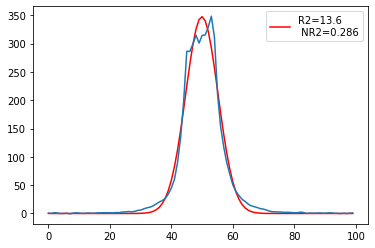

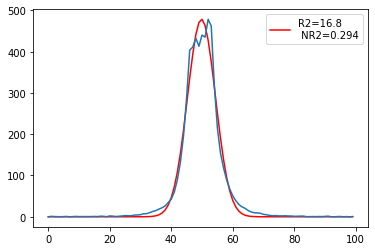

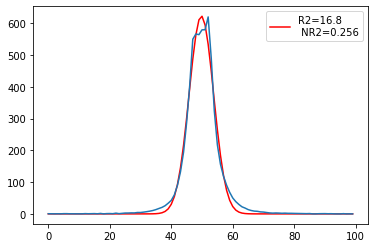

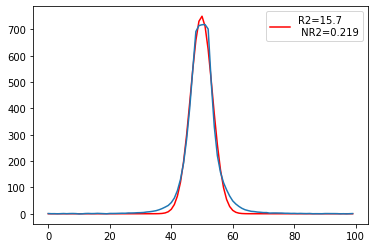

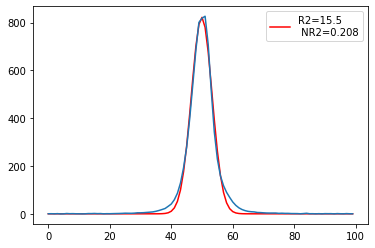

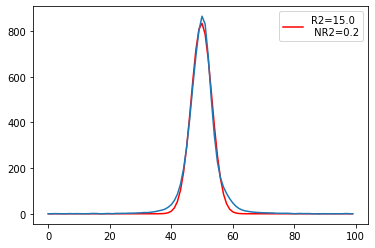

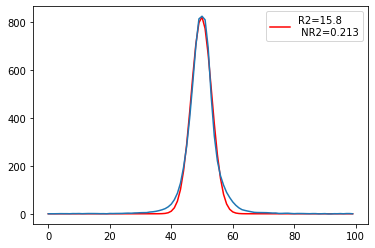

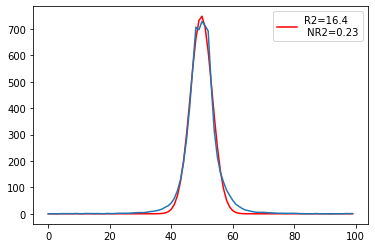

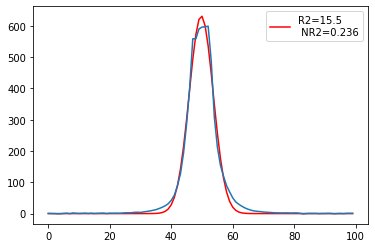

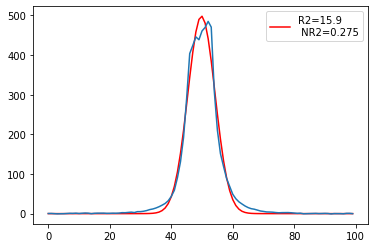

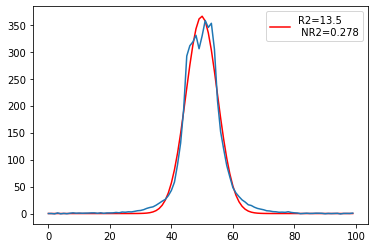

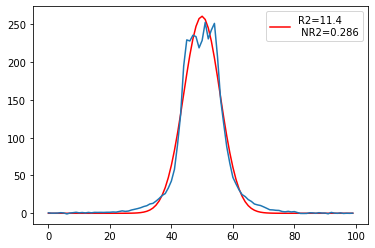

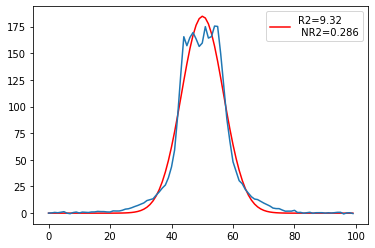

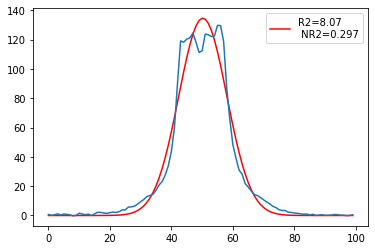

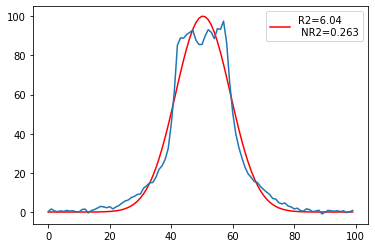

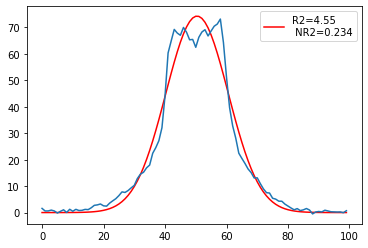

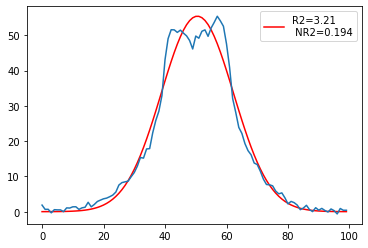

In [ ]:
for i in range(21):
    gaussian.plot_image_profile(rotated_images[0][i])